In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

# **Business Problem Understanding**

**Context**

Bikeshare, short for "bike-sharing," is a transportation system that allows individuals to rent bicycles for short periods, typically for short trips or commutes within urban areas. It offers a convenient and flexible mode of transportation, often complementing public transit systems and providing an environmentally friendly and healthy alternative to cars for short-distance travel

To rent a bike from a bikeshare system, start by signing up for a membership, which often involves creating an account on the system's website or mobile app and providing personal and payment information. Choose a membership plan that suits your needs, and consider downloading the mobile app if available for easier bike location and rental. To rent a bike, locate a nearby bikeshare station with available bikes using the app or station maps. Depending on the system's technology, you can rent a bike by inserting your membership card into the bike dock's card reader, using the mobile app to unlock it by scanning a QR code or entering a code, or using a provided PIN code. Adjust the bike for comfort, start your ride, and when finished, return the bike to any docking station within the service area, ensuring it's securely docked. Confirm the end of your ride, and check your account or the app for ride summaries and any associated charges. Always follow local traffic laws and safety guidelines while riding.

**Problem Statement and Objective**

The bikeshare system faces a dual challenge: optimizing fleet distribution throughout the day to align with fluctuating demand patterns and ensuring the safety and satisfaction of its customers. Efficient fleet distribution involves strategically allocating bikes to meet demand, enhancing operational efficiency and customer convenience. Concurrently, ensuring customer safety and satisfaction necessitates regular fleet maintenance to prevent malfunctions and accidents, requiring seamless scheduling to minimize customer disruption. The objective is to develop a predictive tool that accurately forecasts demand, allowing for optimal bike allocation to match demand dynamics, and facilitates efficient fleet maintenance scheduling to enhance safety and overall customer contentment within the bikeshare system.

**Goals**

The central challenge of this project is to optimize fleet distribution to effectively meet varying customer demands throughout the day. This involves strategically allocating bikes at different times to ensure customer accessibility and satisfaction. Simultaneously, the project aims to develop a precise machine learning model that predicts customer demand for bikeshare services accurately. The primary goal is to enable the bikeshare system to proactively schedule fleet maintenance while maintaining a significant number of bikes readily available for users. This careful fleet management ensures operational efficiency while prioritizing customer safety and preventing customer loss due to maintenance-related disruptions. Ultimately, the project seeks to create a dependable demand forecasting system that aids bikeshare operators in efficiently maintaining their bicycles and enhancing safety, customer satisfaction, and overall operational effectiveness within the bikeshare system.

**Analytic Approach**

We will build a regression model that will help the company provide a prediction tool for bike rental counts for newly added stations in the bikeshare system. This tool will be useful for optimizing their fleet.

**Metric Evaluation**

The evaluation metrics to be used include RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error), where RMSE is the square root of the average of squared errors, MAE is the average of the absolute values of errors, and MAPE is the average percentage error generated by the regression model. The smaller the values of RMSE, MAE, and MAPE produced, the more accurate the model is in predicting rental prices within the limitations of the features used.

Furthermore, we can also use the R-squared or adj. R-squared values if the selected final model is a linear model. The R-squared value is used to assess how well the model can represent the overall variance in the data. The closer the value is to 1, the better the model fits the observed data. However, this metric is not valid for non-linear models.

# **Data Understanding**

- The dataset consists of bicycle rental data from January 1, 2011, to December 31, 2012.
- Each row of data represents information related to bicycle rentals.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday | Object | Date |
| hum | Float | normalized humidity. The values are divided into 100 (max) |
| weathersit | Integer | 1: Clear, Few clouds, Partly cloudy, Partly cloudy ; 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ; 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds ; 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| holiday | Integer | holiday or not |
| season | Integer | 1: winter, 2: spring, 3: summer, 4: fall |
| atemp | Float | Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale) |
| temp | Float | normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale) |
| hr | Integer | hour (0 to 23) |
| casual | Integer | count of casual users |
| registered | Integer | count of registered users |
| cnt | Integer | count of total rental bikes including both casual and registered |

<br>

In [2]:
# Import library that need to explore the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


# **Exploratory Data Analysis**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.isna().sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df.describe(include='all')

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
unique,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,NaN,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,NaN,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,NaN,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,NaN,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,NaN,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000


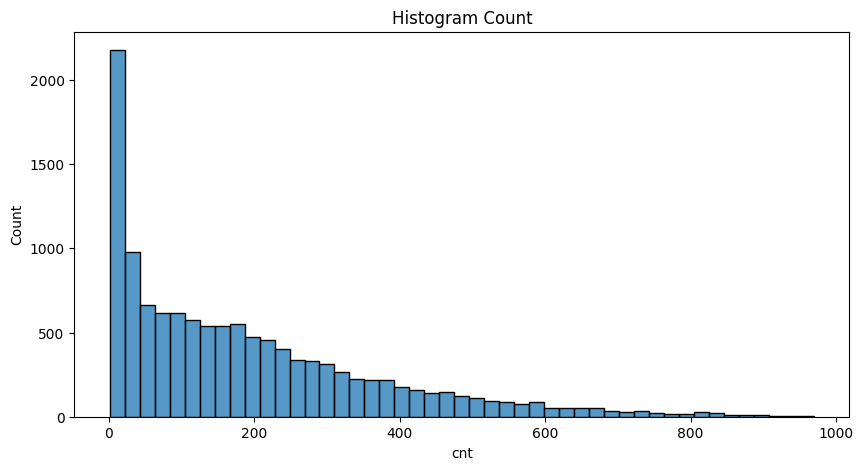

In [7]:
plt.figure(figsize=(10,5))
plt.title('Histogram Count')
sns.histplot(data=df, x='cnt')
plt.show()

In [8]:
from scipy.stats import shapiro

_, pval = shapiro(df['cnt'])

if pval > 0.05:
    print('Normal distribution')
else:
    print('Not Normal Distribution')

Not Normal Distribution


The distribution of our target is not normal, there fore we going to add transformed target regressor in the model benchmarking

# **Data Preprocessing**

In this step, we will perform data cleaning to prepare the data for further analysis. The cleaned data will be used for subsequent analytical processes. Several tasks need to be performed, including:

- Dropping features that are not relevant to the current problem.
- Addressing missing values, either by dropping the corresponding features if they are not needed or by imputing values that make the most sense based on the specific case.

For the data preprocessing and feature engineering processes, we will use a dataframe that is a duplicate of the one used previously.

In [9]:
df_model = df.copy()

##### Check Categorical and Numerical Value

In [10]:
cat_feature = [feature for feature in df_model.columns if (df_model[feature].dtype == 'O')]
cat_feature

['dteday']

In [11]:
for i in cat_feature:
    print(f'Total uique values in {i}: ', df_model[i].nunique())
    print(f'Unique values: ', df_model[i].unique())
    print()

Total uique values in dteday:  731
Unique values:  ['2011-12-09' '2012-06-17' '2011-06-15' '2012-03-31' '2012-07-31'
 '2012-10-01' '2012-08-28' '2012-01-01' '2011-10-13' '2012-06-09'
 '2011-06-28' '2011-12-21' '2012-01-31' '2012-02-07' '2012-05-15'
 '2011-01-04' '2012-02-27' '2012-08-21' '2011-02-13' '2012-07-09'
 '2012-12-18' '2011-06-07' '2012-09-26' '2012-08-20' '2011-02-17'
 '2012-05-08' '2012-06-26' '2011-09-02' '2011-03-29' '2012-06-16'
 '2011-09-17' '2011-07-10' '2011-02-02' '2012-09-23' '2011-02-25'
 '2011-03-12' '2011-05-09' '2012-08-26' '2011-03-31' '2012-03-22'
 '2012-08-24' '2012-05-31' '2012-09-08' '2011-06-25' '2011-10-09'
 '2011-05-05' '2012-05-14' '2012-07-22' '2011-04-02' '2012-02-04'
 '2012-10-22' '2012-02-23' '2012-03-08' '2011-07-23' '2012-01-17'
 '2012-06-22' '2012-10-06' '2012-10-15' '2011-04-07' '2012-01-03'
 '2011-07-18' '2011-10-19' '2011-12-26' '2011-08-10' '2011-11-07'
 '2012-12-17' '2012-03-02' '2011-02-26' '2011-08-22' '2011-03-02'
 '2012-01-28' '2011-10-16

In [12]:
num_feature = [feature for feature in df_model.columns if (df_model[feature].dtype != 'O')]
num_feature

['hum',
 'weathersit',
 'holiday',
 'season',
 'atemp',
 'temp',
 'hr',
 'casual',
 'registered',
 'cnt']

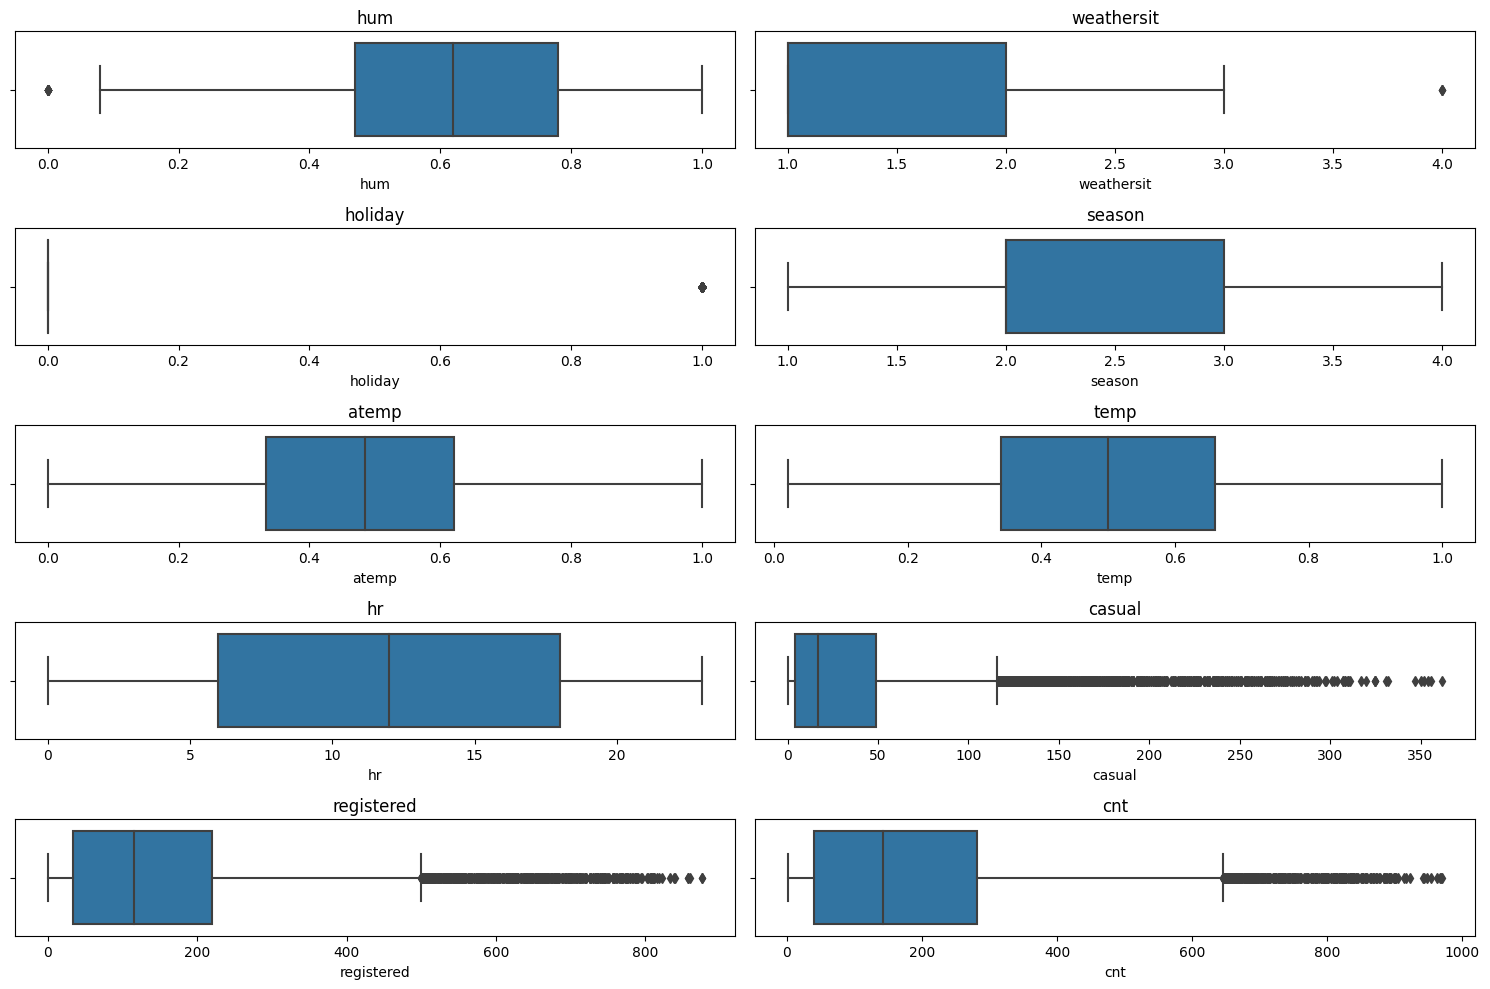

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10), facecolor='white')
plotnumber = 1

for feature in num_feature:
    ax = plt.subplot(5, 2, plotnumber)
    sns.boxplot(data = df_model, x = feature)
    plt.title(feature)
    plotnumber += 1
    plt.tight_layout();

From the distribution above we can see that hum, casual, registered, and cnt have outliers data.

- hum as humidity technically can't have 0% value therefore we going to drop them
- casual, registred, and cnt although have outliers it's still make sense that in a day have more customer than the other day.

## Find and remove odd value

Based on the minimum value of humidity, it is technically imposible that a humidity reach 0%, therefore drop the row that have 0% humidity.

In [14]:
df_model[df_model['hum'] ==0].count()

dteday        14
hum           14
weathersit    14
holiday       14
season        14
atemp         14
temp          14
hr            14
casual        14
registered    14
cnt           14
dtype: int64

Drop 14 data that have 0% value in humidity

In [15]:
df_model = df_model[df_model['hum'] > 0]

## Insert necessary data

Change the dteday data type from object to datetime so that we can insert helping columns such as month, dayofweek and year.

In [16]:
df_model['dteday'] = pd.to_datetime(df_model['dteday'])

In [17]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12151 non-null  datetime64[ns]
 1   hum         12151 non-null  float64       
 2   weathersit  12151 non-null  int64         
 3   holiday     12151 non-null  int64         
 4   season      12151 non-null  int64         
 5   atemp       12151 non-null  float64       
 6   temp        12151 non-null  float64       
 7   hr          12151 non-null  int64         
 8   casual      12151 non-null  int64         
 9   registered  12151 non-null  int64         
 10  cnt         12151 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 1.1 MB


Insert month column

In [18]:
df_model.insert(1,'month', df_model['dteday'].dt.month)
df_model.head()

,dteday,month,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,12,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,6,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,6,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,3,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,7,0.55,1,0,3,0.6970,0.76,18,99,758,857


Insert dayofweek

In [19]:
df_model.insert(2,'dayofweek', df_model['dteday'].dt.day_of_week)
df_model.head()

,dteday,month,dayofweek,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,12,4,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,6,6,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,6,2,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,3,5,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,7,1,0.55,1,0,3,0.6970,0.76,18,99,758,857


Insert year

In [20]:
df_model.insert(3,'year', df_model['dteday'].dt.year)
df_model.head()

,dteday,month,dayofweek,year,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,12,4,2011,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,6,6,2012,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,6,2,2011,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,3,5,2012,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,7,1,2012,0.55,1,0,3,0.6970,0.76,18,99,758,857


## Drop Unecessary Features

date doesn't have any relevance or correlation for predictive data analysis

In [21]:
df_model.drop(columns='dteday', inplace = True)
df_model.head()

,month,dayofweek,year,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,12,4,2011,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,6,6,2012,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,6,2,2011,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,3,5,2012,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,7,1,2012,0.55,1,0,3,0.6970,0.76,18,99,758,857


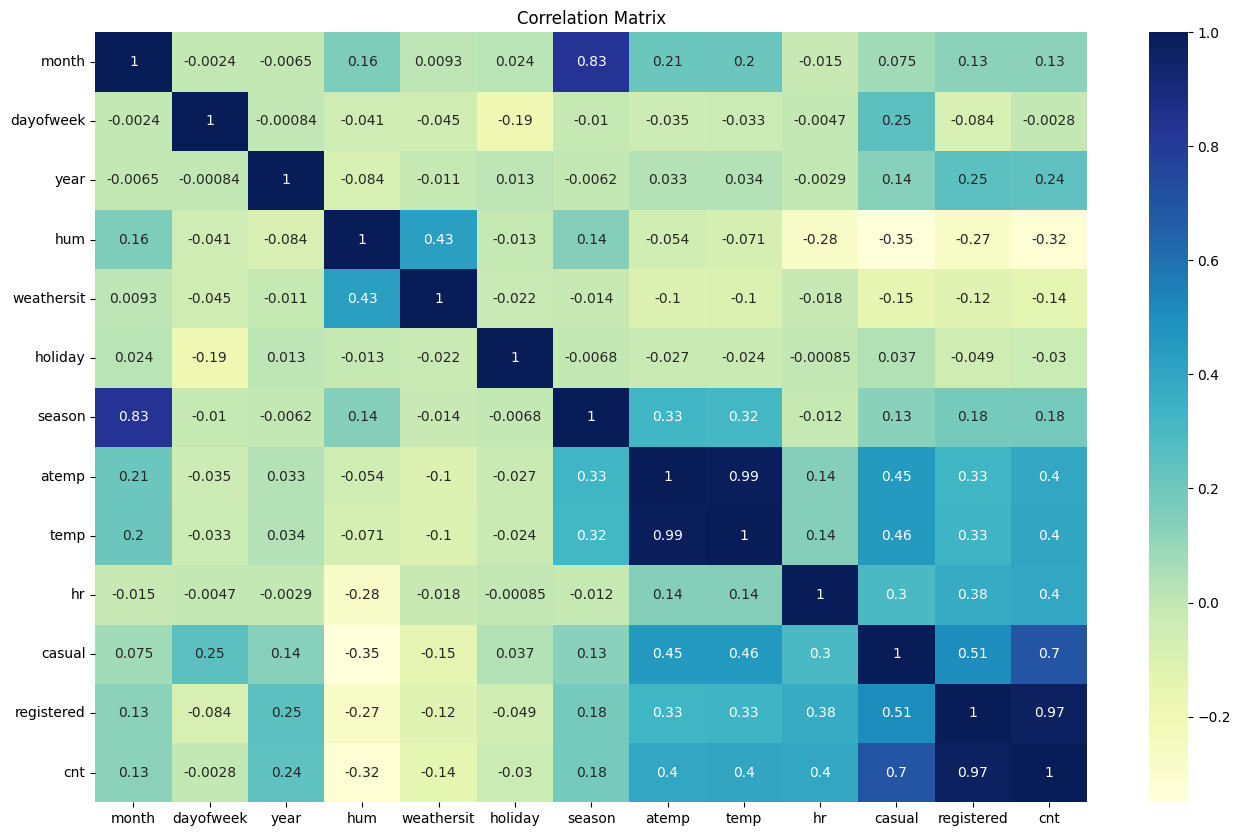

In [22]:
# from above graphs we can say that temp and atemp have a relationship
#let check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(df_model.corr(), annot = True, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

Value above 0.75 is have high correlatation and need to be drop to avoid multicorrelation

High correlation between atemp and temp : Drop atemp

In [23]:
df_model.drop(columns='atemp', inplace = True)
df_model.head()

,month,dayofweek,year,hum,weathersit,holiday,season,temp,hr,casual,registered,cnt
0,12,4,2011,0.62,1,0,4,0.36,16,24,226,250
1,6,6,2012,0.64,1,0,2,0.54,4,2,16,18
2,6,2,2011,0.53,1,0,2,0.62,23,17,90,107
3,3,5,2012,0.87,2,0,2,0.36,8,19,126,145
4,7,1,2012,0.55,1,0,3,0.76,18,99,758,857


Cnt is the sum of casual + registerd therefore they will have a high correlation : drop casual and registered

In [24]:
df_model.drop(columns=['casual', 'registered'], inplace = True)
df_model.head()

,month,dayofweek,year,hum,weathersit,holiday,season,temp,hr,cnt
0,12,4,2011,0.62,1,0,4,0.36,16,250
1,6,6,2012,0.64,1,0,2,0.54,4,18
2,6,2,2011,0.53,1,0,2,0.62,23,107
3,3,5,2012,0.87,2,0,2,0.36,8,145
4,7,1,2012,0.55,1,0,3,0.76,18,857


Month and season also have a high correlation due to most of the time season can be define by their months. Lets try to remove season.

In [25]:
df_model.drop(columns=['season'], inplace = True)
df_model.head()

,month,dayofweek,year,hum,weathersit,holiday,temp,hr,cnt
0,12,4,2011,0.62,1,0,0.36,16,250
1,6,6,2012,0.64,1,0,0.54,4,18
2,6,2,2011,0.53,1,0,0.62,23,107
3,3,5,2012,0.87,2,0,0.36,8,145
4,7,1,2012,0.55,1,0,0.76,18,857


# Modeling

In [26]:

# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

## sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.pipeline import make_pipeline

# train test split
from sklearn.model_selection import train_test_split

# menyatukan beberapa tahap preprocessing atau fungsi lainnya
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# encoder dan scaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer


# algoritma ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor # bagging
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor # boosting
from catboost import CatBoostRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV

# cross validation untuk menentukan algoritma terbaik
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.model_selection import cross_validate

# metrics untuk regresi
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score,mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

**Define Features (X) and Target (y)**

In [27]:
X = df_model.drop(columns=['cnt'])
y = df_model['cnt']

**Train and Test Splitting**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=31
)

**Encoding**

To utilize all selected features, categorical features need to be converted into numerical features. We can use ColumnTransformer to perform this data type conversion, which can then be applied within the model pipeline.

In [29]:
transformer = ColumnTransformer([
    ('standard', StandardScaler(), ['hum', 'holiday','temp','hr','month','dayofweek','weathersit', 'year']),
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('standard', StandardScaler(),
                                 ['hum', 'holiday', 'temp', 'hr', 'month',
                                  'dayofweek', 'weathersit', 'year'])])

**Model Benchmarking**

In [30]:
# Define models
linreg = LinearRegression()
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=31)
xgb = XGBRegressor(random_state = 31)
cat = CatBoostRegressor(random_state=31, verbose=False)
rf = RandomForestRegressor(random_state=31)
gboost = GradientBoostingRegressor(random_state=31)

estimators = [
    ('linreg', LinearRegression()),
    ('tree', DecisionTreeRegressor(random_state=31)),
    ('knn', KNeighborsRegressor()),
    ('xgb' ,XGBRegressor(random_state = 31) ),
    ('cat' ,CatBoostRegressor(random_state=31, verbose=False)),
    ('rf', RandomForestRegressor(random_state=31)),
    ('gboost' , GradientBoostingRegressor(random_state=31))
]


models = {'KNN': knn,
          'Decision Tree': tree,
          'Linear Regression' : linreg,
          'XG Boost' : xgb,
          'CatBoost' : cat,
          'Random Forest' : rf,
          'Gradient Boosting' : gboost
          }

metrics = {'RMSE': 'neg_root_mean_squared_error',
           'MAE': 'neg_mean_absolute_error',
           'MAPE': 'neg_mean_absolute_percentage_error',
        }


test_rmse_arr = []
test_mae_arr = []
test_mape_arr = []
list_algo = []



for name_algo,model in models.items():
    crossval = KFold(n_splits=5)

    estimator = Pipeline([
        ('transorm', transformer),
        ('model', model),
    ])

    list_algo.append(name_algo)
    scores = cross_validate(estimator, X_train, y_train,cv=crossval, scoring=metrics)
    test_rmse_arr.append(scores['test_RMSE'].mean())
    test_mae_arr.append(scores['test_MAE'].mean())
    test_mape_arr.append(scores['test_MAPE'].mean())


for name_algo,model in models.items():
    model_ttr = TransformedTargetRegressor(model, func=np.log, inverse_func=np.exp)
    crossval = KFold(n_splits=5)

    estimator = Pipeline([
        ('transorm', transformer),
        ('model', model_ttr),
    ])

    list_algo.append(f'{name_algo} + Transformed Target Regressor')
    scores = cross_validate(estimator, X_train, y_train,cv=crossval, scoring=metrics)
    test_rmse_arr.append(scores['test_RMSE'].mean())
    test_mae_arr.append(scores['test_MAE'].mean())
    test_mape_arr.append(scores['test_MAPE'].mean())



model_bench = pd.DataFrame({
    'model': list_algo,
    'RMSE': test_rmse_arr,
    'MAE': test_mae_arr,
    'MAPE': test_mape_arr,
})

model_bench

,model,RMSE,MAE,MAPE
0,KNN,-101.158180,-66.829292,-1.415475
1,Decision Tree,-64.443599,-38.043101,-0.412715
2,Linear Regression,-143.060948,-107.212094,-3.310111
3,XG Boost,-44.802489,-27.972722,-0.431392
4,CatBoost,-42.902822,-26.946553,-0.451420
5,Random Forest,-48.219387,-29.094882,-0.355223
6,Gradient Boosting,-72.415302,-49.122359,-0.926079
7,KNN + Transformed Target Regressor,-106.158262,-64.662741,-0.754972
8,Decision Tree + Transformed Target Regressor,-65.860878,-38.435971,-0.405102
9,Linear Regression + Transformed Target Regressor,-165.638568,-110.015366,-1.421536


In [31]:
model_bench.sort_values(by = 'MAE', ascending=False)

,model,RMSE,MAE,MAPE
11,CatBoost + Transformed Target Regressor,-42.124179,-25.520239,-0.248161
4,CatBoost,-42.902822,-26.946553,-0.451420
10,XG Boost + Transformed Target Regressor,-45.643154,-27.347989,-0.265484
3,XG Boost,-44.802489,-27.972722,-0.431392
12,Random Forest + Transformed Target Regressor,-47.601149,-28.649747,-0.289820
5,Random Forest,-48.219387,-29.094882,-0.355223
1,Decision Tree,-64.443599,-38.043101,-0.412715
8,Decision Tree + Transformed Target Regressor,-65.860878,-38.435971,-0.405102
13,Gradient Boosting + Transformed Target Regressor,-78.632936,-48.807054,-0.398160
6,Gradient Boosting,-72.415302,-49.122359,-0.926079


The best scoring model are catboost regressor with transformed target regressor.

CatBoostRegressor, like other gradient boosting regressors, combines the power of multiple decision trees to predict continuous numerical values. It builds a strong ensemble model by iteratively fitting trees to the residuals of the previous ones, minimizing the overall prediction error. CatBoost's innovation lies in its effective handling of categorical features and robust regularization techniques, allowing it to provide accurate predictions even in the presence of mixed data types. It optimizes the splitting strategy, utilizes target encoding for categorical variables, and employs L2 regularization, ultimately resulting in a reliable regression model with strong predictive capabilities.

More information:

https://catboost.ai/en/docs/

## Predict to Test Set with the Benchmark Model

Predict on the dataset using Catboost + Transformed Target Regressor

In [32]:
# Define models
cat = CatBoostRegressor(random_state=31, verbose=False)
cat_ttr = TransformedTargetRegressor(cat, func=np.log, inverse_func=np.exp)

model_before_tuning = Pipeline([
    ('transform', transformer),
    ('model', cat_ttr)
])


test_rmse_arr = []
test_mae_arr = []
test_mape_arr = []
list_algo = []



model_before_tuning.fit(X_train, y_train)
y_pred_before_tuning = model_before_tuning.predict(X_test)
list_algo.append('Catboost Transformed Before Tuning')
test_rmse_arr.append(np.sqrt(mean_squared_error(y_test,y_pred_before_tuning)))
test_mae_arr.append(mean_absolute_error(y_test,y_pred_before_tuning))
test_mape_arr.append(mean_absolute_percentage_error(y_test,y_pred_before_tuning))

model_result = pd.DataFrame({
    'model': list_algo,
    'RMSE': test_rmse_arr,
    'MAE': test_mae_arr,
    'MAPE': test_mape_arr,

})

model_result

,model,RMSE,MAE,MAPE
0,Catboost Transformed Before Tuning,42.39006,24.840857,0.240317


## Predict to dataset with hyperparameter tuning

In the provided `hyperparam_space`, we're defining a hyperparameter search space for tuning a CatBoostRegressor model using scikit-learn's `GridSearchCV` or a similar hyperparameter tuning approach. Let's break down the meaning of each hyperparameter in this context:

1. **`'model__regressor__iterations'`**:
   
   - The number of boosting iterations (trees) to be built. Higher values can lead to better fitting but can also increase the risk of overfitting.

2. **`'model__regressor__learning_rate'`**:
   
   - The step size at which the boosting algorithm adapts and learns. A lower learning rate makes the model more robust but may require more iterations to converge.

3. **`'model__regressor__depth'`**:
   
   - The depth of the individual trees (base learners). It controls the complexity of the model and the interactions captured by each tree.

4. **`'model__regressor__l2_leaf_reg'`**:
   
   - The L2 regularization coefficient for leaf values. It helps control the model's complexity and prevent overfitting.

5. **`'model__regressor__border_count'`**:
   
   - The number of splits used for numerical features. This parameter affects the process of discretizing numerical features, which is important for tree-based models.

6. **`'model__regressor__od_type'`**:
   
   - Type of overfitting detector. Options include no detector (`None`), incremental to decremental change in performance ('IncToDec'), or iteration-based detector ('Iter'). These help control early stopping based on overfitting.

The hyperparameter search space is defined with specific values or a set of options for each hyperparameter. The goal is to use techniques like grid search or random search to explore different combinations of these hyperparameters and find the combination that yields the best performance for the model on the given data.

For example, you might perform a grid search using this hyperparameter space to find the best combination of these parameters by evaluating the model's performance for each combination using cross-validation or a similar validation approach.

In [37]:
hyperparam_space = {
    'model__regressor__iterations': [None, 50, 100, 150],  # Number of boosting iterations
    'model__regressor__learning_rate': [None, 0.01, 0.1, 0.2],  # Learning rate
    'model__regressor__depth': [None, 4, 6, 8, 10],  # Depth of the trees
    'model__regressor__l2_leaf_reg': [None, 1, 3, 5, 7, 9],  # L2 regularization coefficient
    'model__regressor__border_count': [None, 32, 64, 128],  # Number of splits for numeric features
    'model__regressor__od_type': [None, 'IncToDec', 'Iter'],  # Type of overfitting detector
}


cat = CatBoostRegressor(random_state=31, verbose=False)
cat_ttr = TransformedTargetRegressor(cat, func=np.log, inverse_func=np.exp)
model_after_tuning = Pipeline([
    ('transform', transformer),
    ('model', cat_ttr)
])

gridsearch_after_tuning = GridSearchCV(
    estimator=model_after_tuning,
    param_grid=hyperparam_space,
    cv=5,
    scoring = 'neg_mean_absolute_error',
    n_jobs = -1
)

gridsearch_after_tuning.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standard',
                                                                         StandardScaler(),
                                                                         ['hum',
                                                                          'holiday',
                                                                          'temp',
                                                                          'hr',
                                                                          'month',
                                                                          'dayofweek',
                                                                          'weathersit',
                                                                          'year'])])),
                                       ('model',
                                        TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=<catboost.core.CatBoostRegressor object at 0x00...
             n_jobs=-1,
             param_grid={'model__regressor__border_count': [None, 32, 64, 128],
                         'model__regressor__depth': [None, 4, 6, 8, 10],
                         'model__regressor__iterations': [None, 50, 100, 150],
                         'model__regressor__l2_leaf_reg': [None, 1, 3, 5, 7, 9],
                         'model__regressor__learning_rate': [None, 0.01, 0.1,
                                                             0.2],
                         'model__regressor__od_type': [None, 'IncToDec',
                                                       'Iter']},
             scoring='neg_mean_absolute_error')

In [38]:
gridsearch_after_tuning.best_params_

{'model__regressor__border_count': 128,
 'model__regressor__depth': 10,
 'model__regressor__iterations': 150,
 'model__regressor__l2_leaf_reg': 1,
 'model__regressor__learning_rate': 0.2,
 'model__regressor__od_type': 'IncToDec'}

In [39]:
# Define models
model_after_tuning = gridsearch_after_tuning.best_estimator_
model_after_tuning.fit(X_train, y_train)

y_pred_after_tuning = model_after_tuning.predict(X_test)
list_algo.append('Catboost Transformed After Tuning')
test_rmse_arr.append(np.sqrt(mean_squared_error(y_test,y_pred_after_tuning)))
test_mae_arr.append(mean_absolute_error(y_test,y_pred_after_tuning))
test_mape_arr.append(mean_absolute_percentage_error(y_test,y_pred_after_tuning))

model_result = pd.DataFrame({
    'model': list_algo,
    'RMSE': test_rmse_arr,
    'MAE': test_mae_arr,
    'MAPE': test_mape_arr,
})


model_result

,model,RMSE,MAE,MAPE
0,Catboost Transformed Before Tuning,42.390060,24.840857,0.240317
1,Catboost Transformed After Tuning,43.023493,24.956544,0.242029


In [40]:
model_result.sort_values('MAE')

,model,RMSE,MAE,MAPE
0,Catboost Transformed Before Tuning,42.390060,24.840857,0.240317
1,Catboost Transformed After Tuning,43.023493,24.956544,0.242029


In [44]:
hyperparam_space2 = {
    'model__regressor__iterations': [140,145,150,155],  # Number of boosting iterations
    'model__regressor__learning_rate': [0.2,0.3,0.4],  # Learning rate
    'model__regressor__depth': [10,12,14],  # Depth of the trees
    'model__regressor__l2_leaf_reg': [1,2,3],  # L2 regularization coefficient
    'model__regressor__border_count': [112,128,144],  # Number of splits for numeric features
    'model__regressor__od_type': ['IncToDec'],  # Type of overfitting detector
}


cat = CatBoostRegressor(random_state=31, verbose=False)
cat_ttr = TransformedTargetRegressor(cat, func=np.log, inverse_func=np.exp)
model_after_tuning2 = Pipeline([
    ('transform', transformer),
    ('model', cat_ttr)
])

gridsearch_after_tuning2 = GridSearchCV(
    estimator=model_after_tuning2,
    param_grid=hyperparam_space2,
    cv=5,
    scoring = 'neg_mean_absolute_error',
    n_jobs = -1
)

gridsearch_after_tuning2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standard',
                                                                         StandardScaler(),
                                                                         ['hum',
                                                                          'holiday',
                                                                          'temp',
                                                                          'hr',
                                                                          'month',
                                                                          'dayofweek',
                                                                          'weathersit',
                                                                          'year'])])),
                                       ('model',
                                        TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=<catboost.core.CatBoostRegressor object at 0x00000241CE26F710>))]),
             n_jobs=-1,
             param_grid={'model__regressor__border_count': [112, 128, 144],
                         'model__regressor__depth': [10, 12, 14],
                         'model__regressor__iterations': [140, 145, 150, 155],
                         'model__regressor__l2_leaf_reg': [1, 2, 3],
                         'model__regressor__learning_rate': [0.2, 0.3, 0.4],
                         'model__regressor__od_type': ['IncToDec', 'Iter']},
             scoring='neg_mean_absolute_error')

In [45]:
gridsearch_after_tuning2.best_params_

{'model__regressor__border_count': 112,
 'model__regressor__depth': 10,
 'model__regressor__iterations': 155,
 'model__regressor__l2_leaf_reg': 1,
 'model__regressor__learning_rate': 0.2,
 'model__regressor__od_type': 'IncToDec'}

In [46]:
# Define models
model_after_tuning2 = gridsearch_after_tuning2.best_estimator_
model_after_tuning2.fit(X_train, y_train)

y_pred_after_tuning2 = model_after_tuning2.predict(X_test)
list_algo.append('Catboost Transformed After 2nd Tuning')
test_rmse_arr.append(np.sqrt(mean_squared_error(y_test,y_pred_after_tuning2)))
test_mae_arr.append(mean_absolute_error(y_test,y_pred_after_tuning2))
test_mape_arr.append(mean_absolute_percentage_error(y_test,y_pred_after_tuning2))

model_result = pd.DataFrame({
    'model': list_algo,
    'RMSE': test_rmse_arr,
    'MAE': test_mae_arr,
    'MAPE': test_mape_arr,
})


model_result

,model,RMSE,MAE,MAPE
0,Catboost Transformed Before Tuning,42.390060,24.840857,0.240317
1,Catboost Transformed After Tuning,43.023493,24.956544,0.242029
2,Catboost Transformed After 2nd Tuning,43.039260,24.969350,0.241826


In [47]:
model_result.sort_values('MAE')

,model,RMSE,MAE,MAPE
0,Catboost Transformed Before Tuning,42.390060,24.840857,0.240317
1,Catboost Transformed After Tuning,43.023493,24.956544,0.242029
2,Catboost Transformed After 2nd Tuning,43.039260,24.969350,0.241826


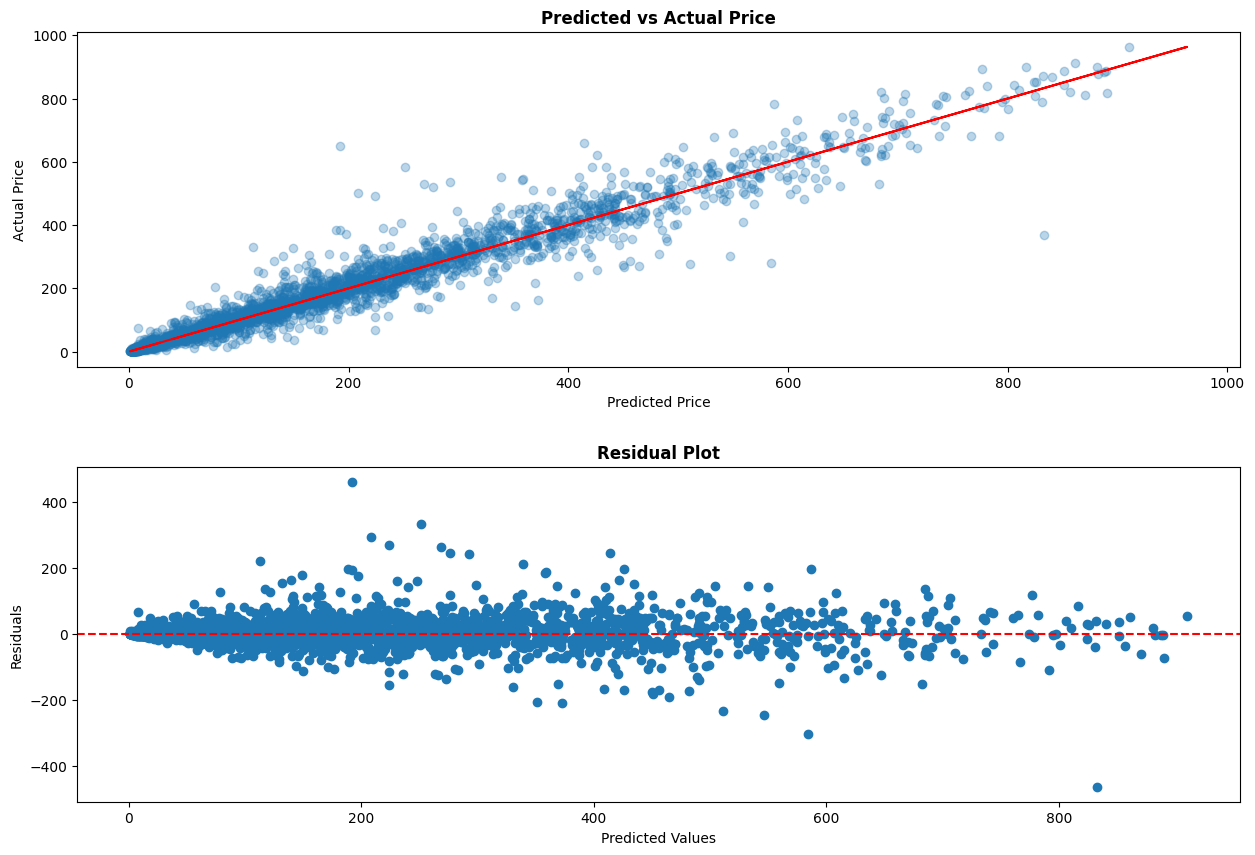

In [59]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Plot actual vs predicted price
ax1.scatter(y_pred_before_tuning, y_test, alpha=0.3)
ax1.plot(y_test, y_test, color='r', alpha=1)
ax1.set_title('Predicted vs Actual Price', fontweight='bold')
ax1.set_xlabel('Predicted Price')
ax1.set_ylabel('Actual Price')

# Plot residual plot
diff = y_test - y_pred_before_tuning
ax2.scatter(y_pred_before_tuning, diff)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot', fontweight='bold')

plt.subplots_adjust(hspace=0.3)

In [33]:
data = pd.DataFrame(y_test).rename(columns={'cnt':'true'})
data['pred'] = y_pred_before_tuning
data['bins'] = pd.cut(x=data['true'], 
                      bins=[1, 250,500 ,750 , 1000], 
                      labels=['1-250', '250-500', '500-750', '750-1000'])
data.head()

,true,pred,bins
7305,40,68.527495,1-250
1844,607,670.322358,500-750
11077,257,426.114180,250-500
4676,276,232.795951,250-500
9141,665,656.678815,500-750


In [34]:
def mape(data):
    return mean_absolute_percentage_error([data['true']], [data['pred']])

data['mape'] = data[['true','pred']].apply(mape, axis=1)
data.head()

,true,pred,bins,mape
7305,40,68.527495,1-250,0.713187
1844,607,670.322358,500-750,0.104320
11077,257,426.114180,250-500,0.658032
4676,276,232.795951,250-500,0.156536
9141,665,656.678815,500-750,0.012513


In [35]:
data.groupby('bins')[['mape']].mean()

,mape
bins,
1-250,0.274095
250-500,0.118392
500-750,0.106638
750-1000,0.059895


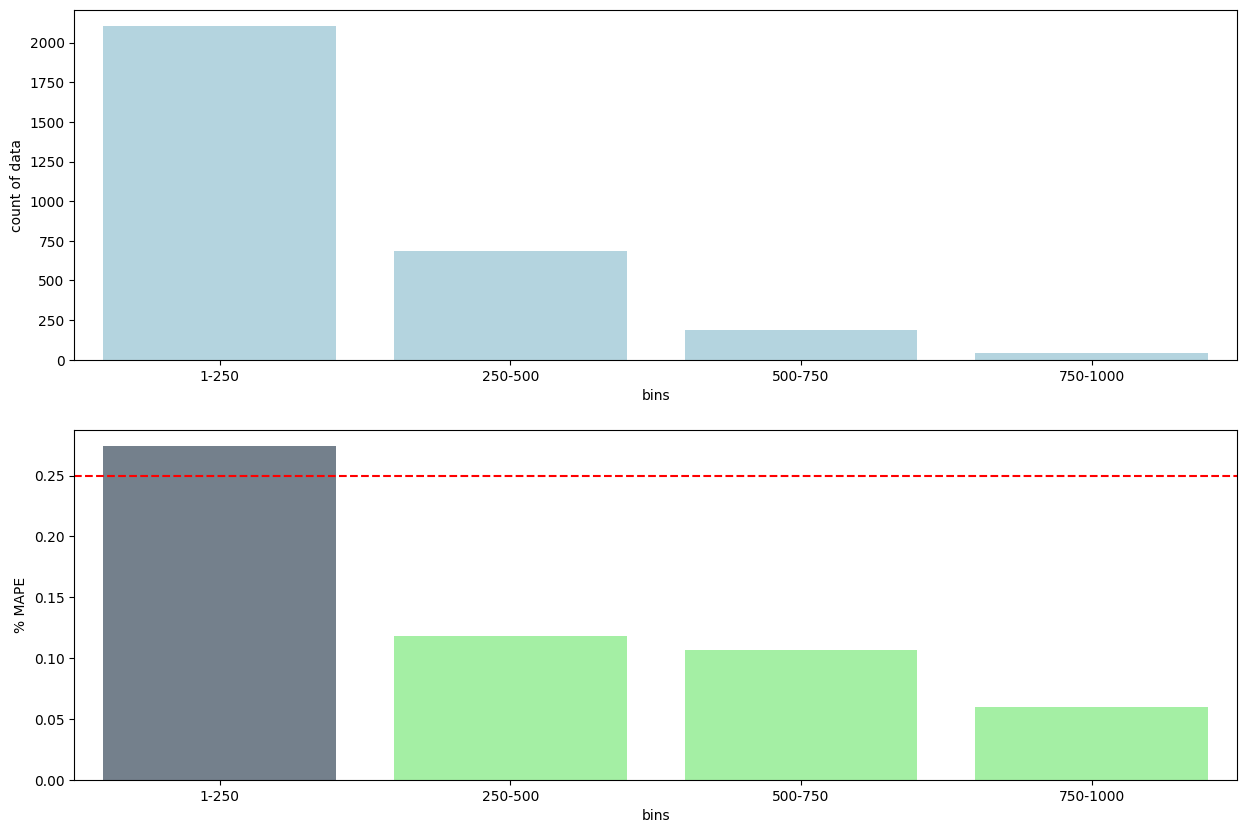

In [40]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

sns.countplot(data=data, x='bins', color='lightblue', ax=ax1)
ax1.set_ylabel('count of data')

data_by = data.groupby('bins')[['mape']].mean()
cols = ['palegreen' if x < 0.25 else '#708090' for x in data_by['mape']]
sns.barplot(data=data, x='bins', y='mape', 
            palette=cols, ax=ax2, 
            estimator='mean',
            errorbar=None)
ax2.axhline(y=0.25, color='red', ls='--');
ax2.set_ylabel('% MAPE');

## Features Importances

To identify the actual features that significantly influence the target (cnt), we can examine them using the `feature_importances_` function.

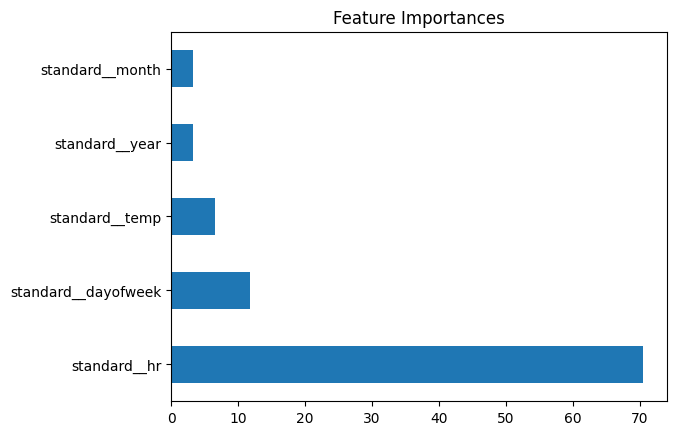

In [56]:
feature_imp = pd.Series(model_before_tuning.named_steps['model'].regressor_.feature_importances_,model_before_tuning.named_steps['transform'].get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

Based on the feature importance analysis, it appears that the most influential factor affecting the model is the hour or time of day during which the bike is being used.

# Conclusion

After preprocessing steps including cleaning, encoding, and scaling the dataset, seven different machine learning models were tested. Each model was also evaluated using a transform target regressor. The most effective model was determined to be CatBoost with a transform target regressor, showcasing RMSE of 42.12, MAE of 25.52, and MAPE of 0.248. Despite attempts at hyperparameter tuning, the initial default settings for CatBoost yielded better results than the tuned configurations. Subsequently, a second hyperparameter tuning was performed, aligning parameters with the optimal values from the first tuning. However, the model continued to perform best with the default CatBoost settings. An analysis of the scatterplot revealed that the model exhibited inaccurate predictions for larger predicted values.

Upon examining scatter and residual plots, a pattern emerged suggesting that higher predicted values corresponded to higher errors. To gain a more objective assessment, the data was categorized into five bins: 1-250, 250-500, 500-750, 750-1000. Surprisingly, the bin encompassing the range 1-250 exhibited a notably higher count of data instances compared to the others. The subsequent creation of a bar chart with a delineating line at a MAPE value of 0.25 revealed that the first bin displayed an average error surpassing this threshold, while the larger bins remained below it. The visualization in the form of a count plot and a bar plot highlighted different observations, emphasizing the need for further investigation and potential reevaluation of the model's performance.

From the MAE score of 24,84 we can assume that the model prediction can be off by more or less 25 bikes. And for MAPE score of 24% the model has a low accuracy but still acceptable. 

https://escholarship.org/content/qt1f71t3x9/qt1f71t3x9.pdf


# Recommendation

**Enhancing the Model and Business Impact:**

To elevate our predictive model and align it closely with business objectives, we propose the following strategies:

1. **Leveraging Time Series Forecasting for Demand Optimization:**
   Incorporating time series forecasting techniques such as ARIMA, SARIMA, SARIMAX, or FB-Prophet based on date data can provide accurate predictions. This can optimize fleet distribution, enabling the bikeshare system to cater effectively to peak demand periods and enhance operational efficiency.

2. **Augmenting Data Collection with Business-Critical Features:**
   Augmenting the dataset with key business-related features such as location data, period of bike use, and total kilometers traveled by the bike can offer valuable insights. Understanding usage patterns in specific locations and during certain periods allows for targeted fleet management, leading to improved customer experience and increased ridership.

3. **Exploring Advanced Machine Learning Algorithms for Precise Demand Insights:**
   Beyond traditional models, exploring sophisticated algorithms like Support Vector Machines, Neural Networks, and ensemble methods like stacking can capture complex patterns in demand. This can provide actionable insights for better resource allocation, informed business decisions, and ultimately drive revenue growth.

4. **Monitoring and Continuous Model Refinement for Effective Business Strategies:**
   Establishing a robust monitoring system to evaluate the model's performance in real-time against defined business metrics is essential. Continuous model refinement based on real-world performance ensures that the predictive tool remains aligned with business goals. This, in turn, guides effective business strategies and investment decisions, fostering growth and competitive advantage.

By incorporating these business-centric recommendations, we aim to not only refine our predictive model but also generate actionable insights that drive strategic decision-making and positively impact the bikeshare system's operational efficiency, safety measures, and overall customer satisfaction, contributing to a successful and sustainable business.

# Save Model

In [38]:
# import pickle

# with open('model_catboost_regressor_transformed_target_regressor.sav', 'wb') as file:
#     pickle.dump(model_before_tuning, file)

**Load Model**

In [39]:
# with open('model_catboost_regressor_transformed_target_regressor.sav', 'rb') as file:
#     loaded_model = pickle.load(file)